# Lab Segmentation 2

In [2]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

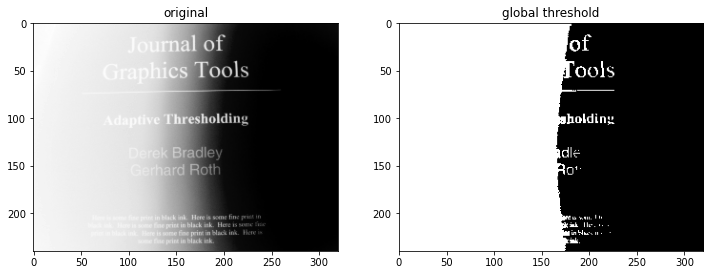

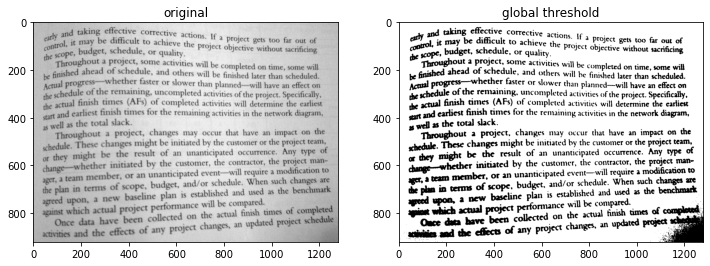

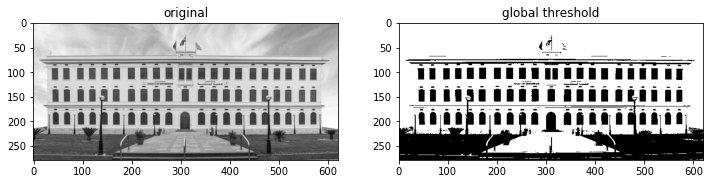

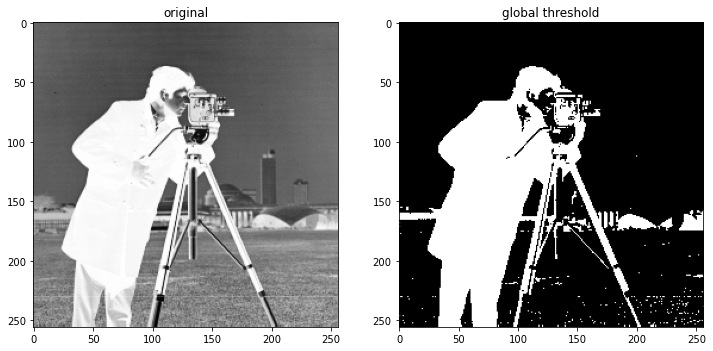

In [62]:

def getHistOfImage(image,nbins =256):
    hist = np.zeros(nbins)
    for i in range(image.shape[0]): 
        for j in range(image.shape[1]):
            hist[image[i,j]] += 1
    return hist

def getThreshold(img, st_range, end_range,hist):
          #convert to gray 
    thr = 0
    im_size = img.shape[0] * img.shape[1] # size of image
    for i in range(st_range,end_range):
        thr += (i * hist[i])      #avg threshold
    return int(round(thr/ np.sum(hist[st_range:end_range])))           # round threshold
    
        
def exe1(path):
    image = io.imread(path)
    gray = rgb2gray(image)    
    g_u8 = gray * 255               # convert to uint8
    g_u8 = g_u8.astype('uint8')     #
    hist = getHistOfImage(g_u8)     #get histogram
    n_thr = getThreshold(g_u8,0,256,hist) # Tint
#     showHist(g_u8)
    p_thr = -1  
    # next threshold
    L_thr = 0
    H_thr = 256
    while n_thr != p_thr:
        L_thr = getThreshold(g_u8,0,n_thr,hist)
        H_thr = getThreshold(g_u8,n_thr,256,hist)
        p_thr = n_thr
        n_thr = (L_thr + H_thr)//2
    bin_img = np.where(g_u8 > n_thr,1,0)
    show_images([g_u8, bin_img],['original','global threshold'])
    
exe1('book.png')
exe1('book1.png')
exe1('cufe.png')
exe1('cameraman.png')





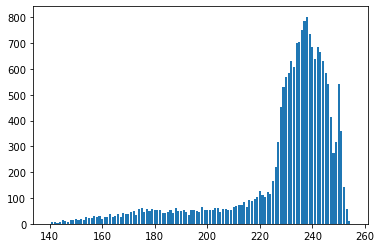

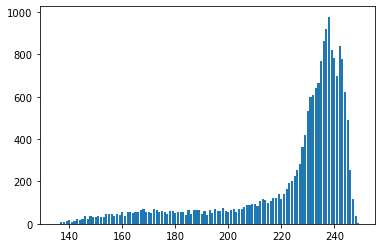

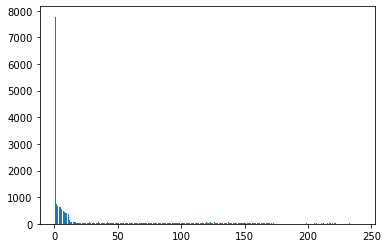

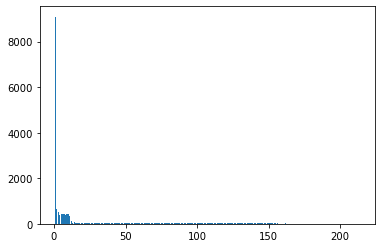

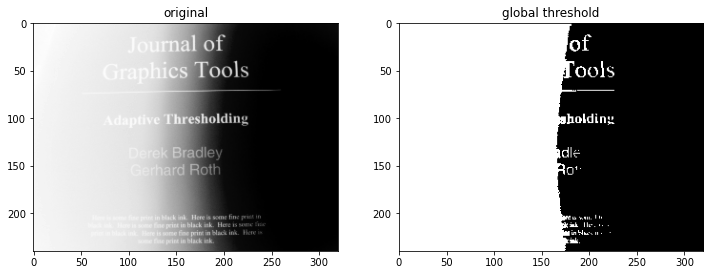

210
205
70
59


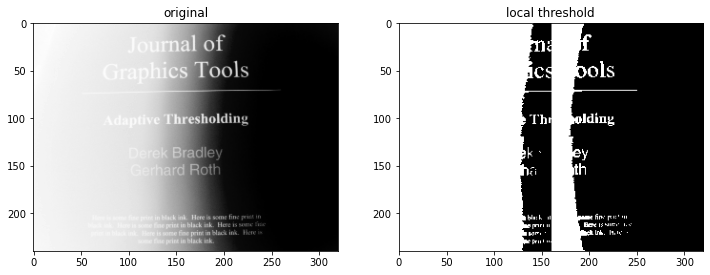

In [80]:
def exe2(img):
    hist = getHistOfImage(img)     #get histogram
    n_thr = getThreshold(img,0,256,hist) # Tint
#     showHist(g_u8)
    p_thr = -1  
    # next threshold
    L_thr = 0
    H_thr = 256
    while n_thr != p_thr:
        L_thr = getThreshold(img,0,n_thr,hist)
        H_thr = getThreshold(img,n_thr,256,hist)
        p_thr = n_thr
        n_thr = (L_thr + H_thr)//2
    print(n_thr)
    return np.where(img > n_thr,1,0)
        

image = io.imread('book.png')
gray = rgb2gray(image)    
org = gray * 255               # convert to uint8
original = org.astype('uint8') 
org = np.array(original)
part1 = org[:org.shape[0]//2,:org.shape[1]//2]
part2 = org[org.shape[0]//2:org.shape[0],:org.shape[1]//2]
part3 = org[:org.shape[0]//2,org.shape[1]//2:org.shape[1]]
part4 = org[org.shape[0]//2:org.shape[0],org.shape[1]//2:org.shape[1]] # bottom right

showHist(part1) #top left part
showHist(part2) # bottom left part
showHist(part3) # top right part
showHist(part4)
exe1('book.png')
halfy = org.shape[0]//2
halfx = org.shape[1]//2

org[:halfy,:halfx] = exe2(part1) #top left part
org[halfy:org.shape[0],:halfx] =exe2(part2) # bottom left part
org[:halfy,halfx:org.shape[1]]= exe2(part3) # top right part
org[halfy:org.shape[0],halfx:org.shape[1]] =exe2(part4)  # bottom right

show_images([original,org],['original','local threshold'])

# to remember ----> the white vertical bar in local because it belongs to the right part and it's more lightened than the part so > thr

# experiment 3 
# org = np.array(original)
# thirdy = org.shape[0]//3
# thirdx = org.shape[1]//3

# part1 = org[:thirdy,:thirdx]
# part2 = org[thirdy:thirdy*2,:thirdx]
# part3 = org[thirdy*2:org.shape[0],:thirdx]

# part4 = org[:thirdy,thirdx:thirdx*2]
# part5 = org[thirdy:thirdy*2,thirdx:thirdx*2]
# part6 = org[thirdy*2:org.shape[0],thirdx:thirdx*2]

# part7 = org[:thirdy,thirdx*2:org.shape[1]]
# part8 = org[thirdy:thirdy*2,thirdx*2:org.shape[1]]
# part9 = org[thirdy*2:org.shape[0],thirdx*2:org.shape[1]]

# org[:thirdy,:thirdx] = exe2(part1)
# org[thirdy:thirdy*2,:thirdx] = exe2(part2)
# org[thirdy*2:org.shape[0],:thirdx] = exe2(part3)
# org[:thirdy,thirdx:thirdx*2] = exe2(part4)
# org[thirdy:thirdy*2,thirdx:thirdx*2] = exe2(part5)
# org[thirdy*2:org.shape[0],thirdx:thirdx*2] = exe2(part6)
# org[:thirdy,thirdx*2:org.shape[1]] = exe2(part7)
# org[thirdy:thirdy*2,thirdx*2:org.shape[1]] = exe2(part8)
# org[thirdy*2:org.shape[0],thirdx*2:org.shape[1]] = exe2(part9)
# show_images([original,org],['original','local threshold'])
